<a href="https://colab.research.google.com/github/JunHL96/PyTorch-Course/blob/main/02_pytorch_classification_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Neural Network Classification

## What is a classification problem?

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:

| Problem type | What is it? | Example |
| ----- | ----- | ----- |
| **Binary classification** | Target can be one of two options, e.g. yes or no | Predict whether or not someone has heart disease based on their health parameters. |
| **Multi-class classification** | Target can be one of more than two options | Decide whether a photo is of food, a person or a dog. |
| **Multi-label classification** | Target can be assigned more than one option | Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosophy). |

<div align="center">
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-different-classification-problems.png" alt="various different classification in machine learning such as binary classification, multiclass classification and multilabel classification" width=900/>
</div>
    
Classification, along with regression (predicting a number, covered in [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/)) is one of the most common types of machine learning problems.

In this notebook, we're going to work through a couple of different classification problems with PyTorch.

In other words, taking a set of inputs and predicting what class those set of inputs belong to.


## What we're going to cover

In this notebook we're going to reiterate over the PyTorch workflow we covered in [01. PyTorch Workflow](https://www.learnpytorch.io/02_pytorch_classification/).

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" alt="a pytorch workflow flowchart" width=900/>

Except instead of trying to predict a straight line (predicting a number, also called a regression problem), we'll be working on a **classification problem**.

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Architecture of a classification neural network** | Neural networks can come in almost any shape or size, but they typically follow a similar floor plan. |
| **1. Getting binary classification data ready** | Data can be almost anything but to get started we're going to create a simple binary classification dataset. |
| **2. Building a PyTorch classification model** | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop** specific to classification. |
| **3. Fitting the model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. Making predictions and evaluating a model (inference)** | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| **5. Improving a model (from a model perspective)** | We've trained and evaluated a model but it's not working, let's try a few things to improve it. |
| **6. Non-linearity** | So far our model has only had the ability to model straight lines, what about non-linear (non-straight) lines? |
| **7. Replicating non-linear functions** | We used **non-linear functions** to help model non-linear data, but what do these look like? |
| **8. Putting it all together with multi-class classification** | Let's put everything we've done so far for binary classification together with a multi-class classification problem. |


## 0. Architecture of a classification neural network

Before we get into writing code, let's look at the general architecture of a classification neural network.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| **Input layer shape** (`in_features`) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| **Hidden layer(s)** | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| **Neurons per hidden layer** | Problem specific, generally 10 to 512 | Same as binary classification |
| **Output layer shape** (`out_features`) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| **Hidden layer activation** | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) but [can be many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification |
| **Output activation** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)| [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch) |
| **Loss function** | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch) |
| **Optimizer** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (see [`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options) | Same as binary classification |

Of course, this ingredient list of classification neural network components will vary depending on the problem you're working on.

But it's more than enough to get started.

We're going to get hands-on with this setup throughout this notebook.

## 1. Make classification data and get it ready

Let's begin by making some data.

We'll use the [`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) method from Scikit-Learn to generate two circles with different coloured dots.

> **Note**: `Scikit-Learn` is a popular Python library that provides efficient tools for machine learning and data analysis. It includes functions for data generation, such as `make_circles()` for creating synthetic datasets, as well as tools for preprocessing, training models, and evaluating performance. This helps streamline the process of developing and prototyping machine learning workflows.

In [1]:
from sklearn.datasets import make_circles  # Import the make_circles function to generate a synthetic dataset

# Number of samples to generate
n_samples = 1000

# Create circles dataset with 1000 samples, slight noise, and a fixed random state for reproducibility
X, y = make_circles(
    n_samples,         # Number of data points to generate
    noise=0.03,        # Adds slight noise to make the data points not perfectly separable, simulating real-world conditions
    random_state=42    # Sets the random seed for reproducibility so that the dataset generated is consistent each time
)

# View the first 5 rows of the dataset
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


Looks like there's two `X` values per one `y` value.

Let's keep following the data explorer's motto of *visualize, visualize, visualize* and put them into a pandas DataFrame.

> **Note**: `pandas` is a powerful open-source Python library used for data manipulation and analysis. It provides data structures like `DataFrame` and `Series` that allow for easy handling and analysis of structured data. With `pandas`, you can perform operations such as data cleaning, merging, reshaping, and aggregation, making it an essential tool for data science and machine learning workflows.

> **Note**: A `DataFrame` is a two-dimensional, tabular data structure provided by the `pandas` library in Python. It is similar to a spreadsheet or SQL table and consists of rows and columns. Each column in a `DataFrame` can hold different types of data (e.g., integers, strings, floats), and it allows for easy data manipulation, analysis, and visualization. `DataFrames` support a wide range of operations such as filtering, grouping, and merging data, making them versatile for data analysis tasks.

In [2]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Create a DataFrame from the generated circle data
circles = pd.DataFrame({
    "X1": X[:, 0],   # The first feature column from the X array (x-coordinates of the points)
    "X2": X[:, 1],   # The second feature column from the X array (y-coordinates of the points)
    "label": y       # The labels indicating the circle each point belongs to (0 or 1)
})

# Display the first 10 rows of the DataFrame to check the data structure
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


It looks like each pair of `X` features (`X1` and `X2`) has a label (`y`) value of either 0 or 1.

This tells us that our problem is **binary classification** since there's only two options (0 or 1).

How many values of each class are there?

In [3]:
# Count the number of occurrences of each label in the 'label' column of the DataFrame
circles.label.value_counts()  # This will display the count of points labeled as 0 and 1



,count
label,
1,500
0,500


The output helps verify the distribution of the data by showing how many samples belong to each class (0 or 1).

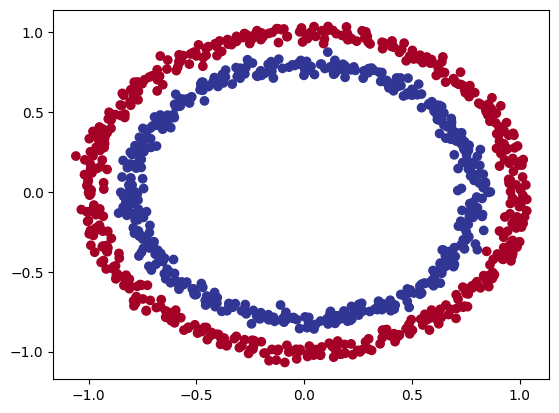

In [4]:
# Import the matplotlib library for plotting
import matplotlib.pyplot as plt

# Create a scatter plot to visualize the circle data
plt.scatter(
    x=X[:, 0],          # x-coordinates of the points (X1)
    y=X[:, 1],          # y-coordinates of the points (X2)
    c=y,                # Color the points based on their labels (0 or 1)
    cmap=plt.cm.RdYlBu  # Use the 'Red-Yellow-Blue' colormap to differentiate the classes visually
);

# The plot displays the points in the feature space, with different colors representing different classes (labels).

Let's find out how we could build a PyTorch neural network to classify dots into red (0) or blue (1).

> **Note:** This dataset is often what's considered a **toy problem** (a problem that's used to try and test things out on) in machine learning.
>
> But it represents the major key of classification, you have some kind of data represented as numerical values and you'd like to build a model that's able to classify it, in our case, separate it into red or blue dots.

### 1.1 Input and output shapes

One of the most common errors in deep learning is shape errors.

Mismatching the shapes of tensors and tensor operations will result in errors in your models.

We're going to see plenty of these throughout the course.

And there's no surefire way to make sure they won't happen, they will.

What you can do instead is continually familiarize yourself with the shape of the data you're working with.

Bourke likes referring to it as input and output shapes.

Ask yourself:

"What shapes are my inputs and what shapes are my outputs?"

Let's find out.

In [5]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

Looks like we've got a match on the first dimension of each.

There's 1000 `X` and 1000 `y`.

But what's the second dimension on `X`?

It often helps to view the values and shapes of a single sample (features and labels).

Doing so will help you understand what input and output shapes you'd be expecting from your model.

In [6]:
# View the first example of features and labels
X_sample = X[0]  # Select the first sample from the feature array (X)
y_sample = y[0]  # Select the first label from the label array (y)

# Print the values of the first sample's features and label
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")

# Print the shapes of the first sample's features and label
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

# This code helps check the format and shape of one data sample to ensure that the data has the expected structure.


Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


**Explanation of Input and Output Shapes**

When working with machine learning models, it's essential to understand the **shapes** of your input (`X`) and output (`y`) data to prevent errors when training or predicting. Here’s how this code relates to getting familiar with the data shapes:

- **`X_sample`** represents a single feature vector (e.g., the coordinates `[x1, x2]` of one data point). The output shows that `X_sample` has a shape of `(2,)`, indicating it is a 1D array with 2 elements (features).
- **`y_sample`** is the label associated with that feature vector (e.g., `0` or `1`). The output shows that `y_sample` has a shape of `()`, indicating it is a scalar (a single value representing the label).



### 1.2 Turn data into tensors and create train and test splits

We've investigated the input and output shapes of our data, now let's prepare it for being used with PyTorch and for modelling.

Specifically, we'll need to:
1. Turn our data into tensors (right now our data is in NumPy arrays and PyTorch prefers to work with PyTorch tensors).
2. Split our data into training and test sets (we'll train a model on the training set to learn the patterns between `X` and `y` and then evaluate those learned patterns on the test dataset).

In [7]:
# Turn data into tensors, otherwise this causes issues with computations later on
import torch
torch.__version__

# Convert the feature array (X) from a NumPy array to a PyTorch tensor and cast it to type float32
X = torch.from_numpy(X).type(torch.float)

# Convert the label array (y) from a NumPy array to a PyTorch tensor and cast it to type float32
y = torch.from_numpy(y).type(torch.float)

# View the first five samples of the feature and label tensors to verify the conversion
X[:5], y[:5]  # Display the first five rows of X and corresponding labels in y


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

Now our data is in tensor format, let's split it into training and test sets.

To do so, let's use the helpful function [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from Scikit-Learn.

We'll use `test_size=0.2` (80% training, 20% testing) and because the split happens randomly across the data, let's use `random_state=42` so the split is reproducible.

In [8]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split  # Import function to split data into training and testing sets

# Split the data into training and testing sets, with 20% of the data reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,  # 20% of the data will be used as the test set, 80% of data for training set
                                                    random_state=42)  # Set a seed for reproducibility of the split

# Print the lengths of the training and testing sets to verify the split
len(X_train), len(X_test), len(y_train), len(y_test)


(800, 200, 800, 200)

**Explanation of `train_test_split`**

`train_test_split` is a function from Scikit-Learn that splits a dataset into two parts: a training set and a testing set. This function takes the feature data (`X`) and target data (`y`) and returns four variables:

- **`X_train`**: The training feature data
- **`X_test`**: The testing feature data
- **`y_train`**: The training target data
- **`y_test`**: The testing target data

**Order of Variables**

The order of the variables returned by `train_test_split` is important to ensure consistency and correctness when training and evaluating your model. The correct order is:

1. **`X_train`**
2. **`X_test`**
3. **`y_train`**
4. **`y_test`**

This order is specified in the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and ensures that the appropriate data is assigned to each variable.

Maintaining this order helps prevent errors in data handling and ensures that your training and testing sets are properly organized.


## 2. Building a model

Let's build a model to classify our blue and red dots.

We'll break it down into a few parts.

1. Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
2. Constructing a model by subclassing `nn.Module`.
3. Defining a loss function and optimizer.
4. Creating a training loop (this'll be in the next section).

The good news is we've been through all of the above steps before in notebook 01.

Except now we'll be adjusting them so they work with a classification dataset.

Let's start by importing PyTorch and `torch.nn` as well as setting up device agnostic code.

In [9]:
# Standard PyTorch imports
import torch
from torch import nn

# Device-Agnostic Code
if torch.cuda.is_available():
    device = "cuda" # NVIDIA GPU
elif torch.backends.mps.is_available():
    device = "mps" # Apple GPU
else:
    device = "cpu" # Defaults to CPU if NVIDIA GPU/Apple GPU aren't available

print(f"Using device: {device}")

Using device: cpu


Excellent, now `device` is setup, we can use it for any data or models we create and PyTorch will handle it on the CPU (default) or GPU if it's available.

How about we create a model?

We'll want a model capable of handling our `X` data as inputs and producing something in the shape of our `y` data as outputs.

In other words, given `X` (features) we want our model to predict `y` (label).

This setup where you have features and labels is referred to as **supervised learning**. Because your data is telling your model what the outputs should be given a certain input.

To create such a model it'll need to handle the input and output shapes of `X` and `y`.

Remember how I said input and output shapes are important? Here we'll see why.

Let's create a model class that:
1. Subclasses `nn.Module` (almost all PyTorch models are subclasses of `nn.Module`).
2. Creates 2 `nn.Linear` layers in the constructor capable of handling the input and output shapes of `X` and `y`.
3. Defines a `forward()` method containing the forward pass computation of the model.
4. Instantiates the model class and sends it to the target `device`.

In [10]:
X_train.shape

torch.Size([800, 2])

In [11]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [12]:
# 1. Construct a model class that inherits from nn.Module for creating neural networks
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()  # Initialize the base class

        # 2. Define two linear layers: input to hidden, and hidden to output
        self.layer_1 = nn.Linear(in_features=2, out_features=5)  # Input layer: 2 features in, 5 features out
        self.layer_2 = nn.Linear(in_features=5, out_features=1)  # Output layer: 5 features in, 1 feature out

    # 3. Implement the forward pass to define how data moves through the network
    def forward(self, x):  # x is the input data
        return self.layer_2(self.layer_1(x))  # Pass input data through layer_1, then through layer_2

# 4. Create an instance of the model and move it to the specified device (e.g., CPU or GPU)
model_0 = CircleModelV0().to(device)
model_0  # Display model architecture


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

**What's going on here?**

We've seen a few of these steps before.

The only major change is what's happening between `self.layer_1` and `self.layer_2`.

`self.layer_1` takes 2 input features `in_features=2` and produces 5 output features `out_features=5`.

This is known as having 5 **hidden units** or **neurons**.

This layer turns the input data from having 2 features to 5 features.

**Why do this?**

This allows the model to learn patterns from 5 numbers rather than just 2 numbers, *potentially* leading to better outputs.

I say potentially because sometimes it doesn't work.

The number of hidden units you can use in neural network layers is a **hyperparameter** (a value you can set yourself) and there's no set in stone value you have to use.

Generally more is better but there's also such a thing as too much. The amount you choose will depend on your model type and dataset you're working with.

Since our dataset is small and simple, we'll keep it small.

The only rule with hidden units is that the next layer, in our case, `self.layer_2` has to take the same `in_features` as the previous layer `out_features`.

That's why `self.layer_2` has `in_features=5`, it takes the `out_features=5` from `self.layer_1` and performs a linear computation on them, turning them into `out_features=1` (the same shape as `y`).

![A visual example of what a classification neural network with linear activation looks like on the tensorflow playground](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-tensorflow-playground-linear-activation.png)
*A visual example of what a similar classification neural network to the one we've just built looks like. Try creating one of your own on the [TensorFlow Playground website](https://playground.tensorflow.org/).*

You can also do the same as above using [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html).

`nn.Sequential` performs a forward pass computation of the input data through the layers in the order they appear.

In [13]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(  # Create a model using a sequential container
    nn.Linear(in_features=2, out_features=5),  # First layer: 2 input features, 5 output features
    nn.Linear(in_features=5, out_features=1)   # Second layer: 5 input features, 1 output feature
).to(device)  # Move the model to the specified device (e.g., CPU or GPU)

# This sequential model has the same outcome and structure as the CircleModelV0 class defined earlier.
model_0  # Display the model to verify the architecture

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6483, -0.4385],
                      [-0.2081,  0.3901],
                      [ 0.4122, -0.0541],
                      [-0.3813,  0.2369],
                      [ 0.5989,  0.1850]])),
             ('0.bias', tensor([ 0.1818, -0.5801, -0.3872,  0.4143,  0.3486])),
             ('1.weight',
              tensor([[ 0.2234,  0.3684,  0.0813, -0.1709,  0.1838]])),
             ('1.bias', tensor([-0.3497]))])

`nn.Sequential` is a powerful utility in PyTorch for creating neural networks that execute a series of layers in order. It simplifies the process of defining models when the computation only needs to follow a linear path from input to output.

**What is `nn.Sequential`?**
`nn.Sequential` allows you to create models where the layers are stacked sequentially, meaning each layer passes its output directly to the next layer. It’s best suited for models that do not require branching or custom layer connections.

You can learn more about it in the [PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html).

**When to Use `nn.Sequential`:**
- Ideal for straightforward, linear computations where the output of one layer is the input to the next.
- Fast to implement and easy to read for simple feedforward architectures.

### Limitations:
- Runs strictly in a sequential order. If your model needs more complex behavior (e.g., multiple branches, residual connections, or conditional logic), you need to subclass `nn.Module` and define a custom `forward` method.

By understanding these points, you can choose between the simplicity of `nn.Sequential` and the flexibility of subclassing `nn.Module` based on your model's requirements.


In [15]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))  # Generate predictions from the untrained model using the test data

# Print the length and shape of the predictions to confirm output dimensions
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")

# Print the length and shape of the test labels to verify consistency
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")

# Display the first 10 predictions from the model for inspection
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")

# Display the first 10 actual test labels to compare with predictions
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.5324],
        [-0.5277],
        [-0.5630],
        [-0.5237],
        [-0.5921],
        [-0.5890],
        [-0.5527],
        [-0.5671],
        [-0.5618],
        [-0.5277]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


"Hmm, it seems there are the same amount of predictions as there are test labels but the predictions don't look like they're in the same form or shape as the test labels.

This shape difference is due to the model's `Linear` layer outputting a 2D tensor (e.g., [200, 1]), which is normal at this stage for compatibility with matrix operations. The test labels are stored as a 1D tensor (e.g., [200]), and this discrepancy can be adjusted in later steps.

We've got a couple steps we can do to fix this, we'll see these later on."

### 2.1 Setup loss function and optimizer

We've setup a loss (also called a criterion or cost function) and optimizer before in [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/#creating-a-loss-function-and-optimizer-in-pytorch).

But different problem types require different loss functions.

For example, for a regression problem (predicting a number) you might use mean absolute error (MAE) loss.

And for a binary classification problem (like ours), you'll often use [binary cross entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) as the loss function.

However, the same optimizer function can often be used across different problem spaces.

For example, the stochastic gradient descent optimizer (SGD, `torch.optim.SGD()`) can be used for a range of problems, and the same applies to the Adam optimizer (`torch.optim.Adam()`).

| Loss function/Optimizer | Problem type | PyTorch Code |
| ----- | ----- | ----- |
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam Optimizer | Classification, regression, many others. | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |
| Binary cross entropy loss | Binary classification | [`torch.nn.BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) or [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| Cross entropy loss | Multi-class classification | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| Mean absolute error (MAE) or L1 Loss | Regression | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) |
| Mean squared error (MSE) or L2 Loss | Regression | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) |  

*Table of various loss functions and optimizers, there are more but these are some common ones you'll see.*

Since we're working with a binary classification problem, let's use a binary cross entropy loss function.

> **Note:** Recall a **loss function** is what measures how *wrong* your model predictions are, the higher the loss, the worse your model.
>
> Also, PyTorch documentation often refers to loss functions as "loss criterion" or "criterion", these are all different ways of describing the same thing.

PyTorch has two binary cross entropy implementations:
1. [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2. [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) - This is the same as above except it has a sigmoid layer ([`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)) built-in (we'll see what this means soon).

Which one should you use?

The [documentation for `torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) states that it's more numerically stable than using `torch.nn.BCELoss()` after a `nn.Sigmoid` layer.

So generally, implementation 2 is a better option. However for advanced usage, you may want to separate the combination of `nn.Sigmoid` and `torch.nn.BCELoss()` but that is beyond the scope of this notebook.

Knowing this, let's create a loss function and an optimizer.

For the optimizer we'll use `torch.optim.SGD()` to optimize the model parameters with learning rate 0.1.

> **Note:** There's a [discussion on the PyTorch forums about the use of `nn.BCELoss` vs. `nn.BCEWithLogitsLoss`](https://discuss.pytorch.org/t/bceloss-vs-bcewithlogitsloss/33586/4). It can be confusing at first but as with many things, it becomes easier with practice.

In [16]:
# Create a loss function
# loss_fn = nn.BCELoss()  # BCELoss = Binary Cross Entropy Loss without sigmoid activation built-in
loss_fn = nn.BCEWithLogitsLoss()  # BCEWithLogitsLoss = Binary Cross Entropy Loss with sigmoid activation built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),  # Specify the model parameters to optimize
                            lr=0.1)  # Set the learning rate for gradient descent


> Note: Sigmoid is a mathematical function that maps input values to a range between 0 and 1, making it ideal for binary classification tasks. It is often applied to the output layer of a model to interpret raw model outputs as probabilities. In `nn.BCEWithLogitsLoss()`, the sigmoid activation is applied internally, simplifying the workflow by combining the activation function and the loss computation into a single step.

> An **activation function** is a mathematical function in a neural network that transforms the output of a neuron. It decides whether a neuron should "activate" (output a signal) and adds **non-linearity**, allowing the network to learn complex patterns.

Examples: ReLU (Most common non-linearity), Sigmoid (0, 1), Softmax (Multi-class)

Now let's also create an **evaluation metric**.

An evaluation metric can be used to offer another perspective on how your model is going.

If a loss function measures how *wrong* your model is, I like to think of evaluation metrics as measuring how *right* it is.

Of course, you could argue both of these are doing the same thing but evaluation metrics offer a different perspective.

After all, when evaluating your models it's good to look at things from multiple points of view.

There are several evaluation metrics that can be used for classification problems but let's start out with **accuracy**.

Accuracy can be measured by dividing the total number of correct predictions over the total number of predictions.

For example, a model that makes 99 correct predictions out of 100 will have an accuracy of 99%.

Let's write a function to do so.



In [17]:
# Calculate accuracy (a classification metric for what percentage of predictions are correct)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()  # torch.eq() checks element-wise equality between y_true and y_pred, sum() counts the number of correct predictions, and item() converts the result to a Python scalar
    acc = (correct / len(y_pred)) * 100  # Calculate the accuracy as a percentage
    return acc  # Return the calculated accuracy

While the loss function quantifies how well the model is performing, it measures the overall error and is often influenced by the scale of predictions (e.g., probabilities, logits). Accuracy, on the other hand, provides an **intuitive and interpretable metric** for classification tasks, showing the percentage of correct predictions.

Key Differences:
- **Loss Function:**
  - Reflects how far predictions are from the true values.
  - Useful for optimizing the model during training.
  - May not directly represent performance in terms of correct/incorrect predictions.
  
- **Accuracy Function:**
  - Directly counts how many predictions match the true labels.
  - Gives a clear understanding of model performance on tasks like classification.
  - Easier to interpret for humans (e.g., 90% accuracy is intuitive compared to a loss of 0.3).

Why Use Both?
- Loss helps in training (minimizing errors), while accuracy provides an interpretable validation metric.
- A model can have a low loss but still have poor accuracy if predictions are close to correct but not quite right.
- Accuracy ensures we monitor performance in a way aligned with the task's objective.

## 3. Train Model

Steps in training:

<details>
    <summary>PyTorch training loop steps</summary>
    <ol>
        <li><b>Forward pass</b> - The model goes through all of the training data once, performing its
            <code>forward()</code> function
            calculations (<code>model(x_train)</code>).
        </li>
        <li><b>Calculate the loss</b> - The model's outputs (predictions) are compared to the ground truth and evaluated
            to see how
            wrong they are (<code>loss = loss_fn(y_pred, y_train</code>).</li>
        <li><b>Zero gradients</b> - The optimizers gradients are set to zero (they are accumulated by default) so they
            can be
            recalculated for the specific training step (<code>optimizer.zero_grad()</code>).</li>
        <li><b>Perform backpropagation on the loss</b> - Computes the gradient of the loss with respect for every model
            parameter to
            be updated (each parameter
            with <code>requires_grad=True</code>). This is known as <b>backpropagation</b>, hence "backwards"
            (<code>loss.backward()</code>).</li>
        <li><b>Step the optimizer (gradient descent)</b> - Update the parameters with <code>requires_grad=True</code>
            with respect to the loss
            gradients in order to improve them (<code>optimizer.step()</code>).</li>
    </ol>
</details>

### 3.1 Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

>  **Logits** are the raw, unnormalized outputs of a model, typically from its final layer, before applying an activation function (e.g. `sigmoid` for BCE and `softmax` for multiclass classification) to convert them into **prediction probabilities**.

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

Before the training loop steps, let's see what comes out of our model during the forward pass (the forward pass is defined by the `forward()` method).

To do so, let's pass the model some data.

In [18]:
# View the first 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]   # to.device() moves the data to the specified device (e.g., CPU or GPU)
y_logits

tensor([[-0.5324],
        [-0.5277],
        [-0.5630],
        [-0.5237],
        [-0.5921]], grad_fn=<SliceBackward0>)

Since our model hasn't been trained, these outputs are basically random.

But *what* are they?

They're the output of our `forward()` method.

Which implements two layers of `nn.Linear()` which internally calls the following equation:

$$
\mathbf{y} = x \cdot \mathbf{Weights}^T  + \mathbf{bias}
$$

The *raw outputs* (unmodified) of this equation ($\mathbf{y}$) and in turn, the raw outputs of our model are often referred to as [**logits**](https://datascience.stackexchange.com/a/31045).

That's what our model is outputing above when it takes in the input data ($x$ in the equation or `X_test` in the code), logits.

However, these numbers are hard to interpret.

We'd like some numbers that are comparable to our truth labels.

To get our model's raw outputs (logits) into such a form, we can use the [sigmoid activation function](https://pytorch.org/docs/stable/generated/torch.sigmoid.html).

Let's try it out.


In [19]:
# Apply the sigmoid function to logits to convert them into probabilities (range: 0 to 1)
y_pred_probs = torch.sigmoid(y_logits)
# View the predicted probabilities for each sample
y_pred_probs

tensor([[0.3700],
        [0.3711],
        [0.3628],
        [0.3720],
        [0.3562]], grad_fn=<SigmoidBackward0>)

Okay, it seems like the outputs now have some kind of consistency (even though they're still random).

They're now in the form of **prediction probabilities** (I usually refer to these as `y_pred_probs`), in other words, the values are now how much the model thinks the data point belongs to one class or another.

In our case, since we're dealing with binary classification, our ideal outputs are 0 or 1.

So these values can be viewed as a decision boundary.

The closer to 0, the more the model thinks the sample belongs to class 0, the closer to 1, the more the model thinks the sample belongs to class 1.

More specificially:
* If `y_pred_probs` >= 0.5, `y=1` (class 1)
* If `y_pred_probs` < 0.5, `y=0` (class 0)

To turn our prediction probabilities into prediction labels, we can round the outputs of the sigmoid activation function.

In [20]:
# Convert prediction probabilities to binary labels (0 or 1) by rounding (threshold at 0.5)
y_preds = torch.round(y_pred_probs)

# Combine the full process: apply sigmoid to logits, round probabilities, and get predicted labels for the first 5 samples
# Logits -> Prediction Probabilities (torch.sigmoid()) -> Prediction Labels (torch.round())
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Verify that the predictions from the split process match the predictions from the full process
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Remove the extra dimension from y_preds for easier handling (from shape [n, 1] to [n])
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)

Excellent! Now it looks like our model's predictions are in the same form as our truth labels (`y_test`).

In [21]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

This means we'll be able to compare our model's predictions to the test labels to see how well it's performing.

To recap, we converted our model's raw outputs (logits) to prediction probabilities using a sigmoid activation function.

And then converted the prediction probabilities to prediction labels by rounding them.

> **Note:** The use of the sigmoid activation function is often only for binary classification logits. For multi-class classification, we'll be looking at using the [softmax activation function](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) (this will come later on).
>
> And the use of the sigmoid activation function is not required when passing our model's raw outputs to the `nn.BCEWithLogitsLoss` (the "logits" in logits loss is because it works on the model's raw logits output), this is because it has a sigmoid function built-in.

### 3.2 Building a training and testing loop

Alright, we've discussed how to take our raw model outputs and convert them to prediction labels, now let's build a training loop.

Let's start by training for 100 epochs and outputing the model's progress every 10 epochs.

In [22]:
torch.manual_seed(42)  # Set a random seed for reproducibility of results

# Set the number of epochs for training
epochs = 100

# Move training and testing data to the target device (CPU or GPU)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build the training and evaluation loop
for epoch in range(epochs):

    ### Training Loop

    # Set the model to training mode
    model_0.train()

    # 1. Forward pass to compute raw logits (unnormalized outputs) for the training data
    y_logits = model_0(X_train).squeeze()             # Squeeze removes extra dimensions (e.g., [n, 1] -> [n])
    y_pred = torch.round(torch.sigmoid(y_logits))     # Convert logits t-> Prediction Probabilities -> Prediction Labels (0 or 1)

    # 3. Calculate accuracy and loss
    acc = accuracy_fn(y_true=y_train,     # Accuracy function compares true labels (y_train) with predictions (y_pred) directly
                      y_pred=y_pred)      # Inputs: y_true = actual labels (y_train), y_pred = rounded probabilities

    # If using nn.BCEWithLogitsLoss, raw logits are passed (sigmoid is applied internally)
    loss = loss_fn(y_logits, y_train)

    # 4. Backpropagation: calculate gradients of the loss with respect to model parameters
    loss.backward()

    # 5. Update model parameters using the optimizer
    optimizer.step()

    # 6. Reset the gradients for the next iteration
    optimizer.zero_grad()

    ### Testing Loop
    model_0.eval()  # Set the model to evaluation mode (disables dropout, uses running stats for BatchNorm)

    with torch.inference_mode():  # Disable gradient computation to save memory during testing
        # 1. Forward pass to compute logits for the test data
        test_logits = model_0(X_test).squeeze()       # Ensure output dimensions match true labels

        # 2. Convert logits to probabilities and then to binary predictions
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 3. Calculate loss on the test data
        test_loss = loss_fn(test_logits, y_test)      # NOTE: loss function expects logits and true labels (not probabilities)

        # 4. Calculate accuracy for test data

        # Inputs: y_true = actual test labels (y_test), y_pred = rounded probabilities
        test_acc = accuracy_fn(y_true=y_test,         # Accuracy function compares true labels (y_test) with predictions (test_pred)
                               y_pred=test_pred)      # Inputs: y_true = actual test labels (y_test), y_pred = rounded probabilities

    # Print out metrics every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.73197 | Accuracy: 50.00% | Test Loss: 0.72857 | Test Accuracy: 50.00%
Epoch: 10 | Loss: 0.70725 | Accuracy: 50.00% | Test Loss: 0.70609 | Test Accuracy: 50.00%
Epoch: 20 | Loss: 0.69832 | Accuracy: 50.00% | Test Loss: 0.69794 | Test Accuracy: 50.00%
Epoch: 30 | Loss: 0.69504 | Accuracy: 50.00% | Test Loss: 0.69499 | Test Accuracy: 50.00%
Epoch: 40 | Loss: 0.69383 | Accuracy: 50.00% | Test Loss: 0.69395 | Test Accuracy: 50.00%
Epoch: 50 | Loss: 0.69337 | Accuracy: 50.00% | Test Loss: 0.69362 | Test Accuracy: 50.00%
Epoch: 60 | Loss: 0.69319 | Accuracy: 50.00% | Test Loss: 0.69356 | Test Accuracy: 50.00%
Epoch: 70 | Loss: 0.69311 | Accuracy: 41.50% | Test Loss: 0.69360 | Test Accuracy: 39.00%
Epoch: 80 | Loss: 0.69307 | Accuracy: 47.88% | Test Loss: 0.69366 | Test Accuracy: 46.50%
Epoch: 90 | Loss: 0.69305 | Accuracy: 50.00% | Test Loss: 0.69374 | Test Accuracy: 46.00%


Hmm, what do you notice about the performance of our model?

It looks like it went through the training and testing steps fine but the results don't seem to have moved too much.

The accuracy barely moves above 50% on each data split.

And because we're working with a balanced binary classification problem, it means our model is performing as good as random guessing (with 500 samples of class 0 and class 1 a model predicting class 1 every single time would achieve 50% accuracy).

## 4. Make predictions and evaluate the model

From the metrics it looks like our model is random guessing.

How could we investigate this further?

I've got an idea.

The data explorer's motto!

"Visualize, visualize, visualize!"

Let's make a plot of our model's predictions, the data it's trying to predict on and the decision boundary it's creating for whether something is class 0 or class 1.

To do so, we'll write some code to download and import the [`helper_functions.py` script](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) from the [Learn PyTorch for Deep Learning repo](https://github.com/mrdbourke/pytorch-deep-learning).

It contains a helpful function called `plot_decision_boundary()` which creates a NumPy meshgrid to visually plot the different points where our model is predicting certain classes.

We'll also import `plot_predictions()` which we wrote in notebook 01 to use later.

In [23]:
import requests  # Import the requests library to handle HTTP requests
from pathlib import Path  # Import Path to manage file paths

# Check if the helper_functions.py file already exists in the current directory
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    # If the file does not exist, download it from the given URL
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")  # Send a GET request to the URL
    with open("helper_functions.py", "wb") as f:  # Open a new file in write-binary mode
        f.write(request.content)  # Write the downloaded content to the file

# Import specific functions from the downloaded helper_functions.py file
from helper_functions import plot_predictions, plot_decision_boundary

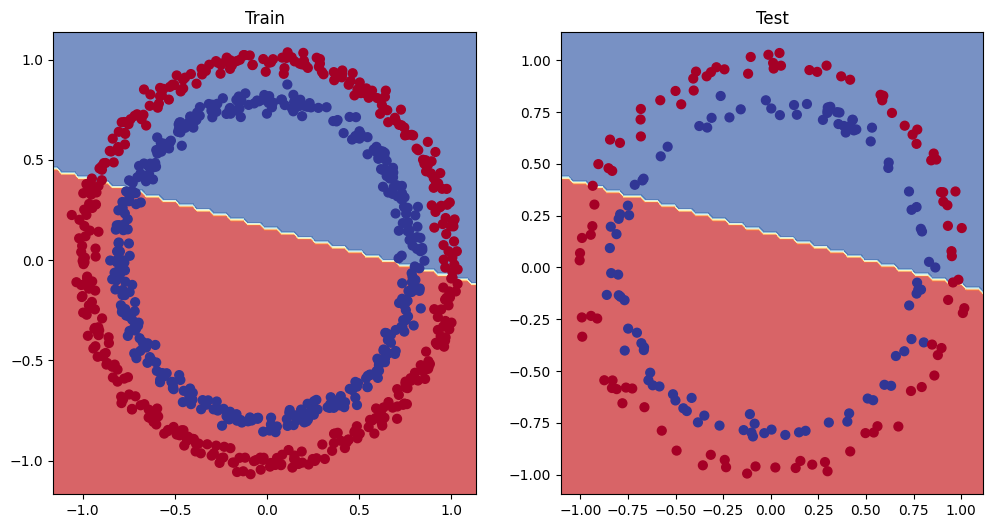

In [24]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))  # Create a figure with a specified size (12 inches wide, 6 inches tall)

# Plot decision boundary for the training data
plt.subplot(1, 2, 1)  # Create the first subplot (1 row, 2 columns, this is the 1st subplot)
plt.title("Train")  # Set the title of the first subplot to "Train"
plot_decision_boundary(model_0, X_train, y_train)  # Plot the decision boundary for the training set

# Plot decision boundary for the test data
plt.subplot(1, 2, 2)  # Create the second subplot (1 row, 2 columns, this is the 2nd subplot)
plt.title("Test")  # Set the title of the second subplot to "Test"
plot_decision_boundary(model_0, X_test, y_test)  # Plot the decision boundary for the test set

Oh wow, it seems like we've found the cause of model's performance issue.

It's currently trying to split the red and blue dots using a straight line...

That explains the 50% accuracy. Since our data is circular, drawing a straight line can at best cut it down the middle.

In machine learning terms, our model is **underfitting**, meaning it's not learning predictive patterns from the data.

How could we improve this?

## 5. Improving a model (from a model perspective)

Let's try to fix our model's underfitting problem.


Focusing specifically on the model (not the data), there are a few ways we could do this.

| Model improvement technique* | What does it do? |
| ----- | ----- |
| **Add more layers** | Each layer *potentially* increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data. More layers are often referred to as making your neural network *deeper*. |
| **Add more hidden units** | Similar to the above, more hidden units per layer means a *potential* increase in learning capabilities of the model. More hidden units are often referred to as making your neural network *wider*. |
| **Fitting for longer (more epochs)** | Your model might learn more if it had more opportunities to look at the data. |
| **Changing the activation functions** | Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint, hint). |
| **Change the learning rate** | Less model specific, but still related, the learning rate of the optimizer decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough. |
| **Change the loss function** | Again, less model specific but still important, different problems require different loss functions. For example, a binary cross entropy loss function won't work with a multi-class classification problem. |
| **Use transfer learning** | Take a pretrained model from a problem domain similar to yours and adjust it to your own problem. We cover transfer learning in [notebook 06](https://www.learnpytorch.io/06_pytorch_transfer_learning/). |

> **Note:** *because you can adjust all of these by hand, they're referred to as **hyperparameters**.
>
> And this is also where machine learning's half art half science comes in, there's no real way to know here what the best combination of values is for your project, best to follow the data scientist's motto of "experiment, experiment, experiment".

Let's see what happens if we add an extra layer to our model, fit for longer (`epochs=1000` instead of `epochs=100`) and increase the number of hidden units from `5` to `10`.

We'll follow the same steps we did above but with a few changed hyperparameters.

In [25]:
class CircleModelV1(nn.Module):  # Define a custom neural network model
    def __init__(self):
        super().__init__()  # Initialize the parent class (nn.Module)

        # Define the first linear layer (input: 2 features, output: 10 features)
        self.layer_1 = nn.Linear(in_features=2, out_features=10)

        # Define the second linear layer (hidden layer with 10 inputs and 10 outputs)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)  # Extra layer for added complexity

        # Define the final layer (output: 1 feature, for binary classification)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):  # Forward method defines how data flows through the model
        # Pass data sequentially through the layers
        return self.layer_3(self.layer_2(self.layer_1(x)))

# Instantiate the model and move it to the specified device (CPU/GPU)
model_1 = CircleModelV1().to(device)
model_1  # Print the model architecture

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

Now we've got a model, we'll recreate a loss function and optimizer instance, using the same settings as before.

In [26]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1) # nn.Linear layer has two sets of learnable parameters, weights and biases

Remember:
* **Weights**: A matrix that maps inputs to outputs.
* **Biases**: A vector added to the outputs to introduce flexibility.

Beautiful, model, optimizer and loss function ready, let's make a training loop.

This time we'll train for longer (`epochs=1000` vs `epochs=100`) and see if it improves our model.

In [27]:
torch.manual_seed(42)  # Set a random seed for reproducibility

epochs = 1000  # Train for a longer duration to improve results

# Move data to the target device (e.g., CPU or GPU)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass: compute raw logits (unnormalized model outputs)
    y_logits = model_1(X_train).squeeze()  # Remove extra dimensions for compatibility
    y_pred = torch.round(torch.sigmoid(y_logits))  # Convert logits to probabilities -> labels (0 or 1)

    # 2. Calculate loss and accuracy on the training set
    loss = loss_fn(y_logits, y_train)  # Compute loss using logits and true labels
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)  # Measure accuracy of predictions

    # 3. Zero gradients to prepare for backpropagation
    optimizer.zero_grad()

    # 4. Backward pass: calculate gradients of loss w.r.t. model parameters
    loss.backward()

    # 5. Update model parameters using the optimizer
    optimizer.step()

    ### Testing
    model_1.eval()  # Set the model to evaluation mode (disable dropout, batch norm updates)
    with torch.inference_mode():  # Disable gradient calculations for efficiency
        # 1. Forward pass: compute logits for test data
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))  # Convert logits to binary labels

        # 2. Calculate loss and accuracy on the test set
        test_loss = loss_fn(test_logits, y_test)  # Compute test loss
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)  # Measure test accuracy

    # Print metrics every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | "
              f"Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


What? Our model trained for longer and with an extra layer but it still looks like it didn't learn any patterns better than random guessing.

Let's visualize.

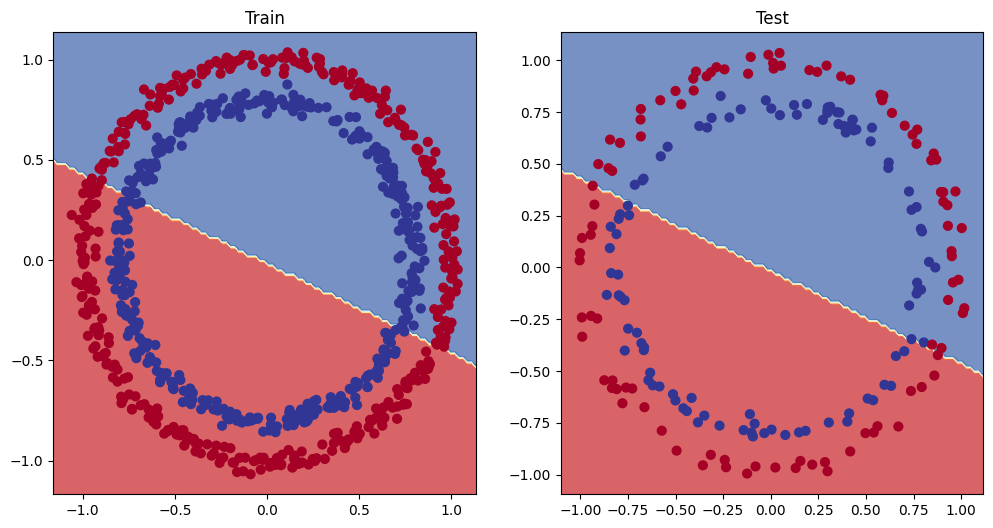

In [28]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

Hmmm.

Our model is still drawing a straight line between the red and blue dots.

If our model is drawing a straight line, could it model linear data? Like we did in [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/)?

### 5.1 Preparing data to see if our model can model a straight line
Let's create some linear data to see if our model's able to model it and we're not just using a model that can't learn anything.

One way to troubleshoot a larger problem is to test out a smaller problem!

In [29]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

Wonderful, now let's split our data into training and test sets.

In [30]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


Beautiful, let's see how the data looks.

To do so, we'll use the `plot_predictions()` function we created in notebook 01.

It's contained within the [`helper_functions.py` script](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) on the Learn PyTorch for Deep Learning repo which we downloaded above.

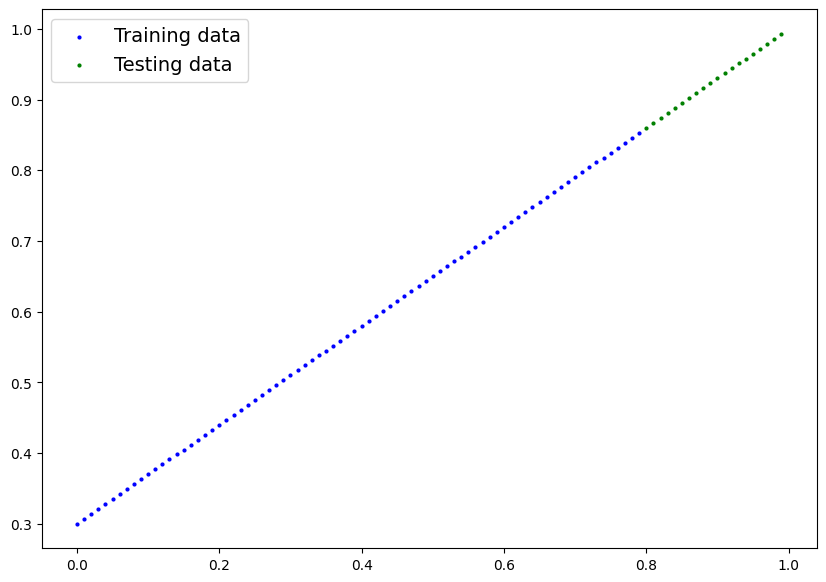

In [31]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

### 5.2 Adjusting `model_1` to fit a straight line

Now we've got some data, let's recreate `model_1` but with a loss function suited to our regression data.

In [32]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

We'll setup the loss function to be `nn.L1Loss()` (the same as mean absolute error) and the optimizer to be `torch.optim.SGD()`.

In [33]:
# Loss and optimizer
loss_fn = nn.L1Loss()   # MAE, suitable for regression
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)   # SGD optimizer

Now let's train the model using the regular training loop steps for `epochs=1000` (just like `model_1`).

> **Note:** We've been writing similar training loop code over and over again. I've made it that way on purpose though, to keep practicing. However, do you have ideas how we could functionize this? That would save a fair bit of coding in the future. Potentially there could be a function for training and a function for testing.

In [34]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05600, Test loss: 0.01425
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603


Okay, unlike `model_1` on the classification data, it looks like `model_2`'s loss is actually going down.

Let's plot its predictions to see if that's so.

And remember, since our model and data are using the target `device`, and this device may be a GPU, however, our plotting function uses matplotlib and matplotlib can't handle data on the GPU.

To handle that, we'll send all of our data to the CPU using [`.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) when we pass it to `plot_predictions()`.

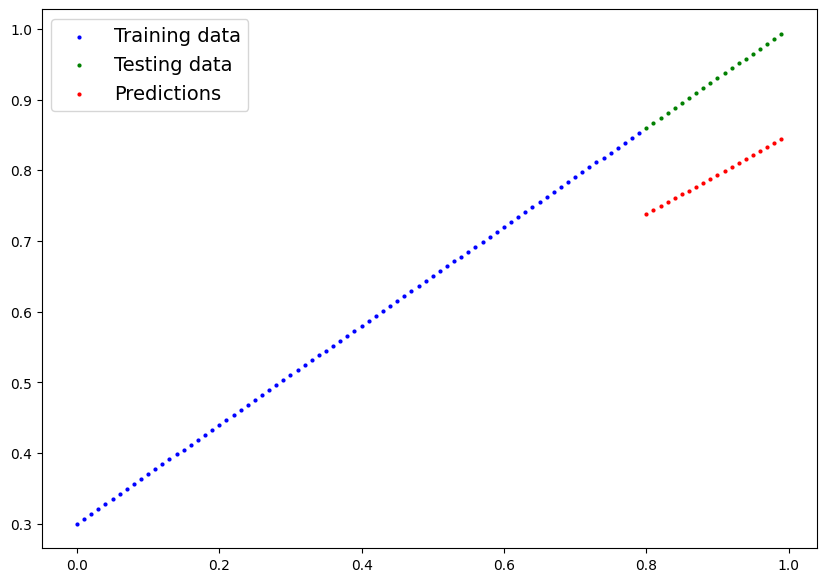

In [35]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

Alright, it looks like our model is able to do far better than random guessing on straight lines.

This is a good thing.

It means our model at least has *some* capacity to learn.

> **Note:** A helpful troubleshooting step when building deep learning models is to start as small as possible to see if the model works before scaling it up.
>
> This could mean starting with a simple neural network (not many layers, not many hidden neurons) and a small dataset (like the one we've made) and then **overfitting** (making the model perform too well) on that small example before increasing the amount of data or the model size/design to *reduce* overfitting.

So what could it be?

Let's find out.

## 6. The missing piece: non-linearity

We've seen our model can draw straight (linear) lines, thanks to its linear layers.

But how about we give it the capacity to draw non-straight (non-linear) lines?

How?

Let's find out.


### 6.1 Recreating non-linear data (red and blue circles)

First, let's recreate the data to start off fresh. We'll use the same setup as before.

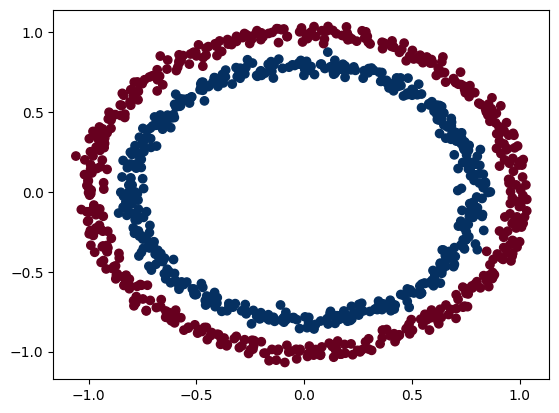

In [36]:
# Make and Plot Data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
                    noise=0.03,
                    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

Nice! Now let's split it into training and test sets using 80% of the data for training and 20% for testing.

In [37]:
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)   # `X`: Features (2D points representing the input data, shape [n_samples, 2])
y = torch.from_numpy(y).type(torch.float)   # `y`: Labels (binary target values, 0 for inner circle, 1 for outer circle)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,  # 20% of the data will be used as the test set, 80% of data for training set
                                                    random_state=42)  # Set a seed for reproducibility of the split

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_train[:5], X_test[:5], y_train[:5], y_test[:5]

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]),
 tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]]),
 tensor([1., 0., 0., 0., 1.]),
 tensor([1., 0., 1., 0., 1.]))

### 6.2 Building a model with non-linearity

Now here comes the fun part.

What kind of pattern do you think you could draw with unlimited straight (linear) and non-straight (non-linear) lines?

I bet you could get pretty creative.

So far our neural networks have only been using linear (straight) line functions.

But the data we've been working with is non-linear (circles).

What do you think will happen when we introduce the capability for our model to use **non-linear activation functions**?

Well let's see.

PyTorch has a bunch of [ready-made non-linear activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) that do similar but different things.

One of the most common and best performing is [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) (rectified linear-unit, [`torch.nn.ReLU()`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)).

Rather than talk about it, let's put it in our neural network between the hidden layers in the forward pass and see what happens.

In [38]:
# Build model with non-linear activation function
from torch import nn  # Import PyTorch's neural network module

class CircleModelV2(nn.Module):  # Define a custom neural network model inheriting from nn.Module
    def __init__(self):
        super().__init__()  # Initialize the parent class (nn.Module)

        # Define the first layer: maps 2 input features to 10 hidden features
        self.layer_1 = nn.Linear(in_features=2, out_features=10)

        # Define the second layer: maps 10 features to another 10 features
        self.layer_2 = nn.Linear(in_features=10, out_features=10)

        # Define the output layer: maps 10 features to a single output (binary classification)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

        # Define the ReLU activation function for introducing non-linearity
        self.relu = nn.ReLU()  # ReLU: Rectified Linear Unit

        # Optional: sigmoid activation for binary probabilities
        # Uncomment to include sigmoid directly in the model's forward pass
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):  # Forward method defines the data flow through the model
        # Apply layer 1 -> ReLU -> layer 2 -> ReLU -> layer 3
        # ReLU introduces non-linearity to enable learning complex patterns
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

# Instantiate the model and move it to the specified device (CPU/GPU)
model_3 = CircleModelV2().to(device)

# Print the model architecture to verify its structure
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


![a classification neural network on TensorFlow playground with ReLU activation](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-tensorflow-playground-relu-activation.png)
*A visual example of what a similar classification neural network to the one we've just built (using ReLU activation) looks like. Try creating one of your own on the [TensorFlow Playground website](https://playground.tensorflow.org/).*

> **Question:** *Where should I put the non-linear activation functions when constructing a neural network?*
>
> A rule of thumb is to put them in between hidden layers and just after the output layer, however, there is no set in stone option. As you learn more about neural networks and deep learning you'll find a bunch of different ways of putting things together. In the meantime, best to experiment, experiment, experiment.

Now we've got a model ready to go, let's create a binary classification loss function as well as an optimizer.

In [39]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

### 6.3 Training a model with non-linearity

You know the drill, model, loss function, optimizer ready to go, let's create a training and testing loop.

In [40]:
torch.manual_seed(42)
epochs = 1000

# Move data to the target device (e.g., CPU or GPU)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


### Training loop
for epoch in range(epochs):
    y_logits = model_3(X_train).squeeze()          # Not squeezing will lead to mismatch with y_train and y_pred
    y_pred = torch.round(torch.sigmoid(y_logits))  # Convert logits to probabilities -> labels (0 or 1)

    loss = loss_fn(y_logits, y_train)              # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)               # Measure accuracy of predictions

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

### Testing loop
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                            y_pred=test_pred)

# Print metrics every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


This looks better!

### 6.4 Evaluating a model trained with non-linear activation functions

Remember how our circle data is non-linear? Well, let's see how our models predictions look now the model's been trained with non-linear activation functions.

In [41]:
# Set the model to evaluation mode
# This disables certain behaviors like dropout and ensures batch norm uses running statistics
model_3.eval()

# Disable gradient calculations to improve performance during inference
with torch.inference_mode():
    # Perform a forward pass with the test data to get raw logits (unnormalized outputs)
    # Apply sigmoid to convert logits into probabilities (values between 0 and 1)
    # Use torch.round to threshold probabilities at 0.5, converting them into binary predictions (0 or 1)
    # Squeeze is used to ensure predictions are in the same shape as the true labels
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

# View the first 10 predictions and corresponding true labels to ensure they match in format
y_preds[:10], y[:10]  # y_preds and y should both be 1D tensors with binary values (0 or 1)

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

Why don't we compare our model without non-linearity (model_1) with our model with non-linearity (model_3)?

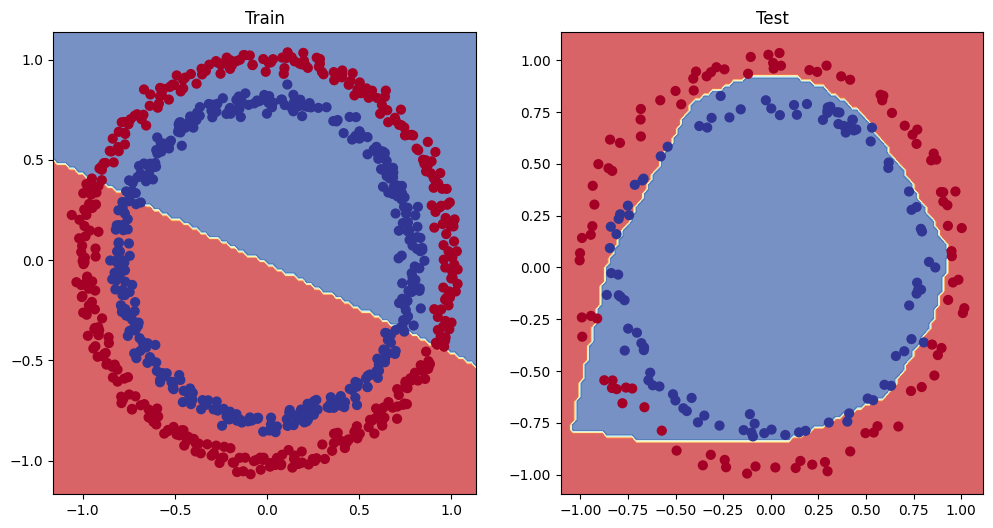

In [42]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))  # Create a figure with specified size

# Training set decision boundary
plt.subplot(1, 2, 1)  # Create first subplot (1 row, 2 columns, first plot)
plt.title("Train")  # Title for the training plot
plot_decision_boundary(model_1, X_train, y_train)  # Plot boundary for model_1 (no non-linearity)

# Test set decision boundary
plt.subplot(1, 2, 2)  # Create second subplot (1 row, 2 columns, second plot)
plt.title("Test")  # Title for the test plot
plot_decision_boundary(model_3, X_test, y_test)  # Plot boundary for model_3 (has non-linearity)

Nice! Not perfect but still far better than before.

Potentially you could try a few tricks to improve the test accuracy of the model? (hint: head back to section 5 for tips on improving the model)